In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from tqdm import tqdm
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pdb_id_chain = os.listdir(r"/content/drive/My Drive/txt_data")
len(pdb_id_chain)

492

In [ ]:

def res_to_binary(res_list):
    res_binary = []
    for res in res_list:
        if res == "A":
            res_binary.append([1, -1, -1, -1])
        if res == "C":
            res_binary.append([-1, 1, -1, -1])
        if res == "G":
            res_binary.append([-1, -1, 1, -1])
        if res == "U":
            res_binary.append([-1, -1, -1, 1])
    return res_binary


def pars_float_list(str_list):
    float_str = []
    for x in str_list:
        if x == " " or x == "" or x == None or x == 'None':
            # print("empty")
            float_str.append(9999)
        else:
            float_str.append(float(x))
    return np.array(float_str)

def data_reader(f_name):
    with open(r"/content/drive/My Drive/txt_data/{}".format(f_name), 'r') as f:
        l = list(f)
        # print(np.array(l[].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").split("\t")[1].replace(" ", "").replace("\n", "").split(",")))
        return {
            "residue": np.array(l[0].replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "residue_number": np.array(l[1].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").split("\t")[1].replace(" ", "").replace("\n", "").split(",")),
            "dihedral": pars_float_list(l[2].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "sin_dihedral":pars_float_list(l[3].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "cos_dihedral":pars_float_list(l[4].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "mean_of_6_x_pos": pars_float_list(l[5].replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "mean_of_6_y_pos": pars_float_list(l[6].replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "mean_of_6_z_pos": pars_float_list(l[7].replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "secondary_structure": pars_float_list(l[8].replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "p_coord": pars_float_list(l[9].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "c5_coord": pars_float_list(l[10].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "o5_coord": pars_float_list(l[11].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "c4_coord": pars_float_list(l[12].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "c3_coord": pars_float_list(l[13].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            "o3_coord": pars_float_list(l[14].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").replace("\n", "").replace(" ", "").split("\t")[1].split(",")),
            # "distance_nucleotide": pars_float_list(l[15].replace("\n", "").replace(" ", "").split("\t")[1].split(",")),

        }


In [ ]:
from sklearn.manifold import MDS
from sklearn import manifold
from sklearn import metrics
import sklearn
def distance_by_coord(c4_coord):
  dist=[]
  dist_mat = sklearn.metrics.euclidean_distances(c4_coord)
  for i in range(len(c4_coord)):
    dist.append(dist_mat[i])
  return dist



In [ ]:
##ba inke felan 15 ta mikhaim begirim ama n gozoshtam k motagheyr bashe.chon kollan toole kheyli ha b  15 nemirese aslan
def n_nearest_nuclt(dist_lists,n):
  dlist=list(dist_lists)
  nearest_nuclt = []
  for i in range(len(dist_lists)):
    l=[]
    dlist[i]=list(dlist[i])
    if min(dlist[i]) == 0:
      dlist[i].remove(0)
    while len(l) < n:
      l.append(min(dlist[i]))
      dlist[i].remove(min(dlist[i]))
    nearest_nuclt.append(l)
  return nearest_nuclt



In [ ]:
print(n_nearest_nuclt([[1,5,3,6],[3,5,4,6],[10,0,9,123]],3))

[[1, 3, 5], [3, 4, 5], [9, 10, 123]]


In [ ]:
my_df = []
for i in range(0, len(pdb_id_chain)):
    # print(i, pdb_id_chain[i])
    my_df.append(data_reader(pdb_id_chain[i]))


In [ ]:
new_df = pd.DataFrame(columns=['pdb_id_chain', 'res_code', 'res_number','dihedral','sin_dihedral','cos_dihedral', 'mean_of_x_pos', 'mean_of_y_pos', 'mean_of_z_pos', 'secondary_structure','p_coord','c5_coord','o5_coord','c4_coord', 'c3_coord','o3_coord','distance_by_c4','distance_by_mean','7_nearest_nuclt'])
max_length = 0
min_length = 9999
sum_length = 0
length = []
max_x_pos = 0
max_y_pos = 0
max_z_pos = 0
min_x_pos = 9999
min_y_pos = 9999
min_z_pos = 9999

In [ ]:
# my_df[0]["c4_coord"]
def coord_to_xyz(list):
  xyz = []
  for i in range(0,len(list)-2,3):
    l=[]
    l.append(list[i])
    l.append(list[i+1])
    l.append((list[i+2]))
    xyz.append(l)
  return xyz

In [ ]:
def dihedral_to_6(list):
  xyz = []
  for i in range(0,len(list)-5,6):
    l=[]
    l.append(list[i])
    l.append(list[i+1])
    l.append((list[i+2]))
    l.append(list[i+3])
    l.append(list[i+4])
    l.append((list[i+5]))
    
    xyz.append(l)
  return xyz  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for i in tqdm(range(0, len(pdb_id_chain))):
    new_df.loc[i] = ([pdb_id_chain[i].split(".")[0],
                      # max_length roo khodesh dadam sefr nazare
                      res_to_binary(my_df[i]["residue"]),
                      my_df[i]["residue_number"],
                      dihedral_to_6(my_df[i]["dihedral"]),
                      dihedral_to_6(my_df[i]["sin_dihedral"]),
                      dihedral_to_6(my_df[i]["cos_dihedral"]),
                      my_df[i]["mean_of_6_x_pos"],
                      my_df[i]["mean_of_6_y_pos"],
                      my_df[i]["mean_of_6_z_pos"],
                      my_df[i]["secondary_structure"],
                      coord_to_xyz(my_df[i]["p_coord"]),
                      coord_to_xyz(my_df[i]["c5_coord"]),
                      coord_to_xyz(my_df[i]["o5_coord"]),
                      coord_to_xyz(my_df[i]["c4_coord"]),
                      coord_to_xyz(my_df[i]["c3_coord"]),
                      coord_to_xyz(my_df[i]["o3_coord"]),
                      distance_by_coord(coord_to_xyz(my_df[i]["c4_coord"])),
                      #halesha nadashtam mean ro dorost konam.maghzam nemikeshid.bara hamin tekrari gozoshtam
                      distance_by_coord(coord_to_xyz(my_df[i]["c4_coord"])),
                      n_nearest_nuclt(distance_by_coord(coord_to_xyz(my_df[i]["c4_coord"])),6)

                      ])
    #     common data
    length.append(len(my_df[i]["residue"]))
    sum_length += len(my_df[i]["residue"])
    if max_length <= len(my_df[i]["residue"]):
        max_length = len(my_df[i]["residue"])
    if min_length >= len(my_df[i]["residue"]):
        min_length = len(my_df[i]["residue"])
    if max_x_pos <= my_df[i]["mean_of_6_x_pos"].max():
        max_x_pos = my_df[i]["mean_of_6_x_pos"].max()
    if max_y_pos <= my_df[i]["mean_of_6_y_pos"].max():
        max_y_pos = my_df[i]["mean_of_6_y_pos"].max()
    if max_z_pos <= my_df[i]["mean_of_6_z_pos"].max():
        max_z_pos = my_df[i]["mean_of_6_z_pos"].max()
    if min_x_pos >= my_df[i]["mean_of_6_x_pos"].min():
        min_x_pos = my_df[i]["mean_of_6_x_pos"].min()
    if min_y_pos >= my_df[i]["mean_of_6_y_pos"].min():
        min_y_pos = my_df[i]["mean_of_6_y_pos"].min()
    if min_z_pos >= my_df[i]["mean_of_6_z_pos"].min():
        min_z_pos = my_df[i]["mean_of_6_z_pos"].min()


100%|██████████| 492/492 [03:49<00:00,  2.14it/s]


In [ ]:
##nuclt 1 ra b khatere inke aksaran "p" nadashtan kollan hazf kardam.vali baaad bayad unaii k faghat p nadaran ro az sare tavali hazf konam!

In [ ]:
new_df['dihedral'][0]

[[9999.0,
  129.59157058395684,
  29.872905435815834,
  74.37945320053515,
  -147.6860295157944,
  -61.24000202517333],
 [64.73882279916053,
  167.57420232341946,
  57.00017622568327,
  78.9962190884562,
  -134.3235479693592,
  -79.56872872157977],
 [67.38246128074015,
  161.0094384360149,
  59.34145902249309,
  72.29687881617467,
  -130.9992864306783,
  -140.6823054098912],
 [-88.40446309165836,
  165.64330815734928,
  -64.15414895725574,
  156.36779939978499,
  -131.6666247776191,
  77.48617177151527],
 [74.1571713205786,
  -171.94055931616631,
  58.896758330164445,
  148.46993438475928,
  -77.19854476008616,
  -49.255353970216156],
 [75.23673274802809,
  -158.76861855699002,
  54.62379095337724,
  152.63731810433862,
  -128.0747523872351,
  164.23662706721422],
 [88.2336213300237,
  179.9802176598549,
  38.33627925784531,
  86.70889967192265,
  -145.0454682575345,
  -70.45503821200715],
 [85.89850999431947,
  169.53886385431517,
  41.1018419001359,
  82.76665869934695,
  -131.003052

In [ ]:


min_all = np.array([min_x_pos, min_y_pos, min_z_pos]).min()
max_all = np.array([max_x_pos, max_y_pos, max_z_pos]).max()
print("mean length : ", sum_length/len(pdb_id_chain))
print("max length : ", max_length)
print("min length : ", min_length)
print("x-> max:", max_x_pos, "min:", min_x_pos)
print("y-> max:", max_y_pos, "min:", min_y_pos)
print("z-> max:", max_z_pos, "min:", min_z_pos)
print("max for scaler : ", max_all)
print("min for scaler : ", min_all)


# pd.to_pickle(new_df, r"/content/drive/My Drive/pickle_dataframe")

mean length :  346.030487804878
max length :  3772
min length :  50
x-> max: 497.7483367919922 min: -198.793337504069
y-> max: 436.66050211588544 min: -219.70633188883463
z-> max: 453.3953399658203 min: -198.43533325195312
max for scaler :  497.7483367919922
min for scaler :  -219.70633188883463


In [ ]:
new_df['res_number'][0]

array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='<U2')

In [ ]:
# def check_discontiuous(res_numbers):
#   for i in range(len(res_numbers)):


def find_chain_discontinuous(new_df):
  chain_discontinuous_idx = []
  for i in tqdm_notebook(range(len(new_df))):
    for j in range(len(new_df['res_number'][i])-1):
      if new_df['res_number'][i][j] != 9999: 
        if np.absolute(int(new_df['res_number'][i][j]) - int(new_df['res_number'][i][j+1])) > 1 :
          if j != 0:
            b = []
            b.append(j)
            chain_discontinuous_idx.append([i,b])

  for i in tqdm_notebook(range(len(chain_discontinuous_idx))):
    for j in range(i+1,len(chain_discontinuous_idx)):
      if chain_discontinuous_idx[i][0] == chain_discontinuous_idx[j][0]:
        for a in chain_discontinuous_idx[i][1]:
          chain_discontinuous_idx[j][1].append(a)
          # print(a)
        for b in chain_discontinuous_idx[j][1]:
          chain_discontinuous_idx[i][1].append(b)
          # print(b)
        chain_discontinuous_idx[i][1] = list(set(chain_discontinuous_idx[i][1]))
        chain_discontinuous_idx[j][1] = list(set(chain_discontinuous_idx[i][1]))
        # print(chain_discontinuous_idx[j][1])
  chain_discontinuous_idx = np.array(chain_discontinuous_idx)

  del_idx = []
  for i in tqdm_notebook(range(len(chain_discontinuous_idx))):
    for j in range(i+1,len(chain_discontinuous_idx)):
      if chain_discontinuous_idx[i][0] == chain_discontinuous_idx[j][0]:
        del_idx.append(i) 

  chain_discontinuous_idx = np.delete(chain_discontinuous_idx,del_idx,0)

  for i in range(len(chain_discontinuous_idx)):  
    chain_discontinuous_idx[i][1].sort()  
    chain_discontinuous_idx[i][1].append(-1)
  return chain_discontinuous_idx



In [ ]:
chain_discon_idx=find_chain_discontinuous(new_df)

In [ ]:
#inja dg distane ha 

def split_discontinuous_chains(df,chain_discon_idx):
  my_df = pd.DataFrame(columns=list(df))
  for i in tqdm_notebook(range(len(df))):
    bad_chain_idx = "None"
    for j in range(len(chain_discon_idx)):
      if chain_discon_idx[j][0] == i:
        bad_chain_idx = j
    if bad_chain_idx == "None" :
      my_df = my_df.append([{'pdb_id_chain':df['pdb_id_chain'][i],
                     'res_code':df['res_code'][i],
                     'res_number':df['res_number'][i],
                     'dihedral': df["dihedral"][i],
                     'sin_dihedral': df["sin_dihedral"][i],
                     'cos_dihedral': df["cos_dihedral"][i],
                     'mean_of_x_pos': df["mean_of_x_pos"][i],
                     'mean_of_y_pos':df["mean_of_y_pos"][i],
                     'mean_of_z_pos': df["mean_of_z_pos"][i],
                     'secondary_structure': df["secondary_structure"][i],
                     'p_coord':df["p_coord"][i],
                     'c5_coord':df["c5_coord"][i],
                     'o5_coord':df["o5_coord"][i],
                     'c4_coord':df["c4_coord"][i],
                     'c3_coord':df["c3_coord"][i],
                     'o3_coord':df["o3_coord"][i]}],
                    #  'x_pos':df['x_pos'][i],
                    #  'y_pos':df['y_pos'][i],
                    #  'z_pos':df['z_pos'][i]}],
                      ignore_index=True)
    if bad_chain_idx != "None" :
      idx_s = 0
      for k in range(len(chain_discon_idx[bad_chain_idx][1])):
        idx_e = chain_discon_idx[bad_chain_idx][1][k]+1
        if (k != len(chain_discon_idx[bad_chain_idx][1]) - 1):
          my_df = my_df.append([{'pdb_id_chain':df['pdb_id_chain'][i]+"_"+str(k),
                      'res_code':df['res_code'][i][idx_s:idx_e],
                      'res_number':df['res_number'][i][idx_s:idx_e],
                      'dihedral': df["dihedral"][i][idx_s:idx_e],
                      'sin_dihedral': df["sin_dihedral"][i][idx_s:idx_e],
                      'cos_dihedral': df["cos_dihedral"][i][idx_s:idx_e],
                      'mean_of_x_pos': df["mean_of_x_pos"][i][idx_s:idx_e],
                      'mean_of_y_pos':df["mean_of_y_pos"][i][idx_s:idx_e],
                      'mean_of_z_pos': df["mean_of_z_pos"][i][idx_s:idx_e],
                      'secondary_structure': df["secondary_structure"][i][idx_s:idx_e],
                      'p_coord':df["p_coord"][i][idx_s:idx_e],
                      'c5_coord':df["c5_coord"][i][idx_s:idx_e],
                      'o5_coord':df["o5_coord"][i][idx_s:idx_e],
                      'c4_coord':df["c4_coord"][i][idx_s:idx_e],
                      'c3_coord':df["c3_coord"][i][idx_s:idx_e],
                      'o3_coord':df["o3_coord"][i][idx_s:idx_e]}],
                      # 'x_pos':df['x_pos'][i][idx_s:idx_e],
                      # 'y_pos':df['y_pos'][i][idx_s:idx_e],
                      # 'z_pos':df['z_pos'][i][idx_s:idx_e]}],
                        ignore_index=True)
        if (k == len(chain_discon_idx[bad_chain_idx][1]) - 1):
          my_df = my_df.append([{'pdb_id_chain':df['pdb_id_chain'][i]+"_"+str(k),
                    'res_code':df['res_code'][i][idx_s:],
                    'res_number':df['res_number'][i][idx_s:],
                    'dihedral': df["dihedral"][i][idx_s:],
                    'sin_dihedral': df["sin_dihedral"][i][idx_s:],
                    'cos_dihedral': df["cos_dihedral"][i][idx_s:],
                    'mean_of_x_pos': df["mean_of_x_pos"][i][idx_s:],
                    'mean_of_y_pos':df["mean_of_y_pos"][i][idx_s:],
                    'mean_of_z_pos': df["mean_of_z_pos"][i][idx_s:],
                    'secondary_structure': df["secondary_structure"][i][idx_s:],
                    'p_coord':df["p_coord"][i][idx_s:],
                    'c5_coord':df["c5_coord"][i][idx_s:],
                    'o5_coord':df["o5_coord"][i][idx_s:],
                    'c4_coord':df["c4_coord"][i][idx_s:],
                    'c3_coord':df["c3_coord"][i][idx_s:],
                    'o3_coord':df["o3_coord"][i][idx_s:]}],
                    # 'x_pos':df['x_pos'][i][idx_s:],
                    # 'y_pos':df['y_pos'][i][idx_s:],
                    # 'z_pos':df['z_pos'][i][idx_s:]}],
                      ignore_index=True)
        idx_s = idx_e
  return my_df


In [ ]:
def_continuous=split_discontinuous_chains(new_df,chain_discon_idx )
wh=def_continuous

In [ ]:
for i in range(len(wh['sin_dihedral'])):
  wh['sin_dihedral'][i] = pd.to_numeric(wh['sin_dihedral'][i], errors='coerce')
  wh['cos_dihedral'][i] = pd.to_numeric(wh['cos_dihedral'][i], errors='coerce')
  wh['dihedral'][i] = pd.to_numeric(wh['dihedral'][i], errors='coerce')
  wh['p_coord'][i] = pd.to_numeric(wh['p_coord'][i], errors='coerce')
  wh['c5_coord'][i] = pd.to_numeric(wh['c5_coord'][i], errors='coerce')
  wh['o5_coord'][i] = pd.to_numeric(wh['o5_coord'][i], errors='coerce')
  wh['c4_coord'][i] = pd.to_numeric(wh['c4_coord'][i], errors='coerce')
  wh['c3_coord'][i] = pd.to_numeric(wh['c3_coord'][i], errors='coerce')
  wh['o3_coord'][i] = pd.to_numeric(wh['o3_coord'][i], errors='coerce')
pd.to_pickle(wh, r"/content/drive/My Drive/pickle_dataframe")

## clustering and visualize




In [ ]:
wh = def_continuous

In [ ]:
len(wh)

2052

In [ ]:
wh.describe()

,pdb_id_chain,res_code,res_number,dihedral,sin_dihedral,cos_dihedral,mean_of_x_pos,mean_of_y_pos,mean_of_z_pos,secondary_structure,p_coord,c5_coord,o5_coord,c4_coord,c3_coord,o3_coord,distance_by_c4,distance_by_mean,7_nearest_nuclt
count,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,0,0,0
unique,2052,1773,2047,2052,2052,2052,2052,2052,2052,1561,2052,2052,2052,2052,2052,2052,0,0,0
top,6RM3_L50_11,"[[-1, -1, 1, -1]]",[38],"[[9999.0, -145.52009358803627, 118.14934076291...","[[9999.0, -0.8451424081511851, -0.942882570680...","[[9999.0, 0.5345412144488164, 0.33312528860304...","[350.6686655680339, 346.01300557454425, 341.40...","[263.9254964192708, 263.32683817545575, 265.73...","[298.91533915201825, 302.6821645100911, 305.36...",[9999],"[[351.715, 265.654, 296.755], [347.153, 263.01...","[[350.981, 263.625, 298.272], [346.755, 262.58...","[[351.971, 264.612, 297.932], [346.7, 263.487,...","[[350.971, 263.347, 299.76], [346.379, 263.278...","[[349.672, 263.672, 300.48], [345.152, 264.174...","[[348.702, 262.643, 300.293], [343.939, 263.42...",NaN,NaN,NaN
freq,1,26,3,1,1,1,1,1,1,492,1,1,1,1,1,1,NaN,NaN,NaN


## ...

In [ ]:
print(len(def_continuous['res_number']))
length= []
s=0
for i in range(len(def_continuous['res_number'])):
  s=s+1
  length.append(len(def_continuous['res_number'][i]))
print(s)
print(len(length))

56
56
56


(array([31.,  9.,  5.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  1.        ,  37.84615385,  74.69230769, 111.53846154,
        148.38461538, 185.23076923, 222.07692308, 258.92307692,
        295.76923077, 332.61538462, 369.46153846, 406.30769231,
        443.15384615, 480.        , 516.84615385, 553.69230769,
        590.53846154, 627.38461538, 664.23076923, 701.07692308,
        737.92307692, 774.76923077, 811.61538462, 848.46153846,
        885.30769231, 922.15384615, 959.        ]),
 <a list of 26 Patch objects>)

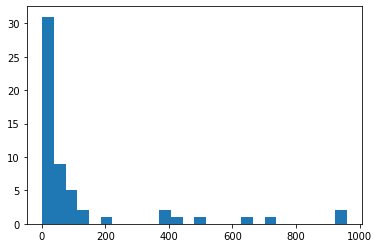

In [ ]:
import matplotlib.pyplot as plt
plt.hist(length, bins = 'auto')


In [ ]:
print(len(length))
print(len(set(length)))

56
44


In [ ]:
dihed=[]
for i in range(len(def_continuous['res_number'])):
  for j in range(len(def_continuous['res_number'][i])):
    dihed.append(len(def_continuous['dihedral'][i][j]))

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.900e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

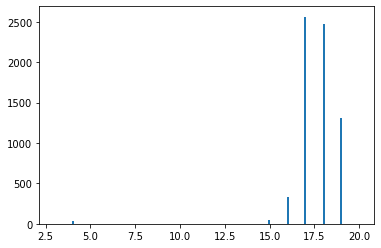

In [ ]:
plt.hist(dihed, bins = 'auto')


In [ ]:
def_continuous['dihedral'][0][0]

'None'